# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import numpy as np 
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
%matplotlib inline
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [2]:
gold = pd.read_csv("GOLD.csv")
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date', drop = True, inplace = True)
gold.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
df_droped = gold.dropna()
df_to_fill = gold.iloc[411 :, :]
empties = np.where(pd.isnull(gold))

x = df_droped[['Open', 'High', 'Low', 'Price']].values
pred = df_droped.Pred.values
new = df_droped.new.values
print('shape of pred data =', pred.shape)
print('shape of x data =', x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, pred, test_size=0.4, random_state=5)
lm = LinearRegression()
lm.fit(x_train,y_train)
print('pred\'s score =', lm.score(x_test,y_test))
print('pred\'s score =', lm.coef_)
print('bias =', lm.intercept_)

pred_to_fill = lm.predict(df_to_fill[['Open', 'High', 'Low', 'Price']])
new_pridicted_pred = np.hstack((df_droped['Pred'].values, pred_to_fill))
gold['Pred2'] = new_pridicted_pred
print('')

shape of pred data = (411,)
shape of x data = (411, 4)
pred's score = 1.0
pred's score = [ 3. -1. -4.  2.]
bias = -1.4267698134062812e-11



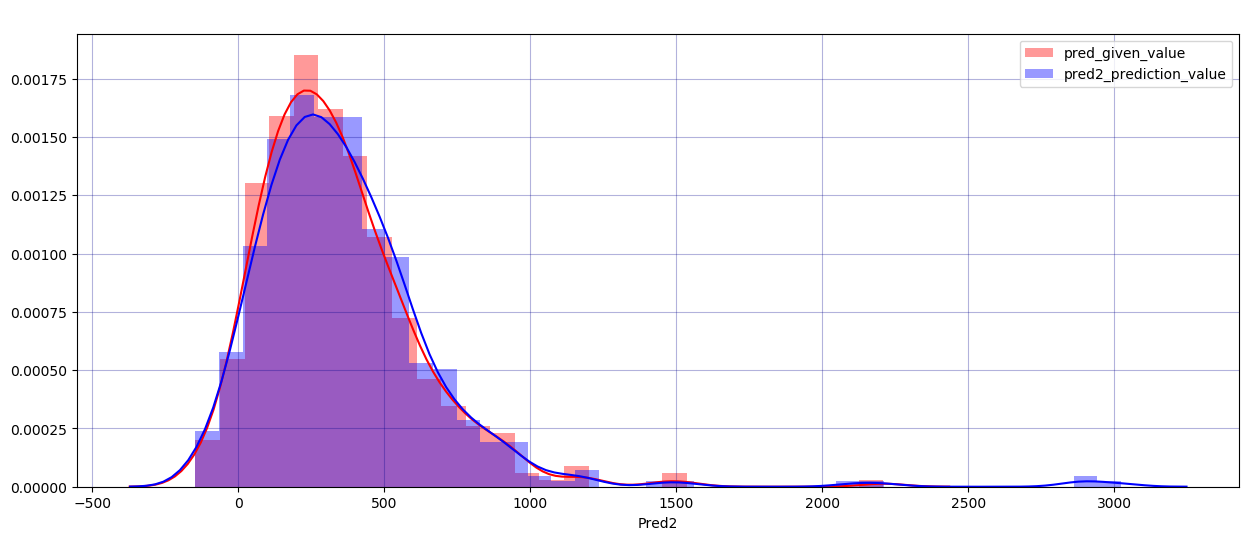

In [4]:
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
sns.distplot(pred, color="r")
sns.distplot(gold['Pred2'], color="b")
plt.title(' ', size = 15, color='red')
plt.legend(['pred_given_value', 'pred2_prediction_value'])
plt.show()

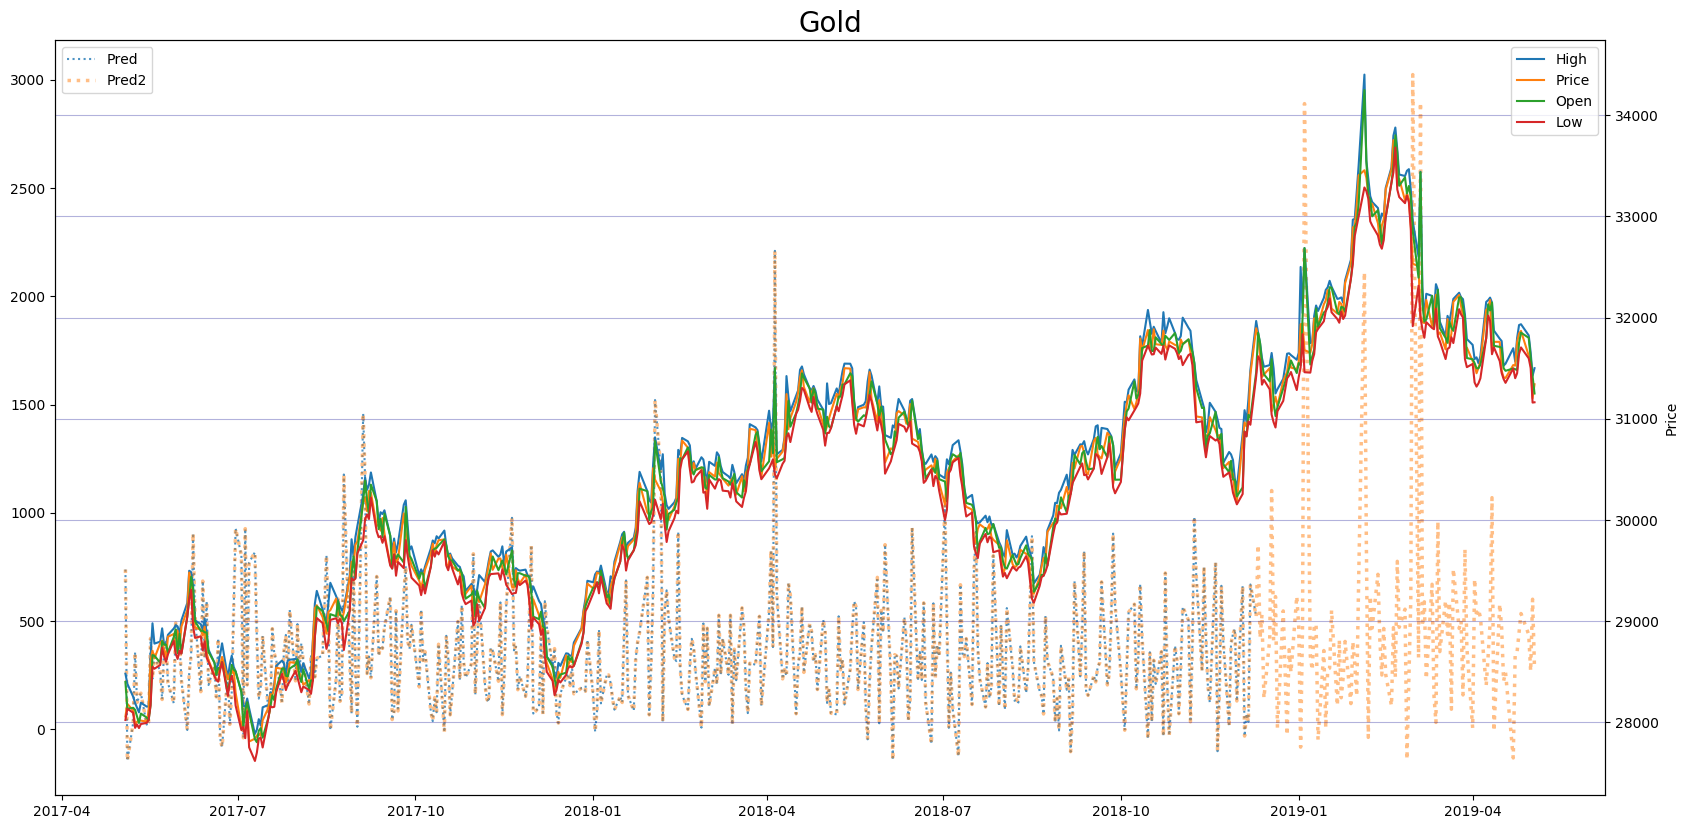

In [5]:
fig = plt.figure(figsize = (20,10), dpi = 100)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax2.plot( gold.High,  label='High' );  
ax2.plot( gold.Price, label='Price' ); 
ax2.plot( gold.Open,  label='Open' );  
ax2.plot( gold.Low,   label='Low' );   
ax1.plot( gold.Pred,  label='Pred', linestyle=':', alpha = 0.8, linewidth = 1.5);
ax1.plot( gold.Pred2,  label='Pred2', linestyle=':',alpha = 0.5,linewidth = 2.5);
ax2.legend(loc='upper right')
ax1.legend(loc='upper left')

plt.grid(color = 'darkBlue', alpha = 0.3)
plt.title('Gold', size = 20)
plt.ylabel('Price')
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, new, test_size=0.4, random_state=40)

lm2 = LinearRegression()
lm2.fit(x_train,y_train)

print('pred\'s score =', lm2.score(x_test,y_test))
print('pred\'s score =', lm2.coef_)
print('bias =', lm2.intercept_)

new_to_fill = lm2.predict(df_to_fill[['Open', 'High', 'Low', 'Price']])
new_pridicted_new = np.hstack((df_droped['new'].values, new_to_fill))
gold['new2'] = new_pridicted_new

pred's score = 0.9999934163203935
pred's score = [-1.00106703  1.0046364  -1.01609871  1.01251127]
bias = -0.721413231673921


In [7]:
gold.describe()

,Price,Open,High,Low,Pred,new,Pred2,new2
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859,370.033203,245.178747
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897,341.296591,205.729029
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172,164.000000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244,322.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031,495.000000,320.995463
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485,3024.000000,1402.582596


### Answer
Pred is linear function.
new is ploynomial function.
>Pred has a score of 1.0 which means a perfect match between predictions and observed output.
>>Since r2 score of the pred column is greater than the score of new column therefore it is linearly dependent with OHLC and new is ploynomial function of OHLC. 

# Query 3.2

###### Import the stock of your chosing and the nifty index.

>Using Linear Regression (OLS), Calculate-
>>The Daily Beta value for the past 3 Months (Daily = Daily returns).
>>>The Monthly beta value. (Monthly = Monthly returns)

Refrain from using the (Covariance(x,y)/Variance(x)) Formula.
#### Attempt the question using Regression.

>Were the Beta values More or Less than 1? What if it was Negative?

>Discuss. Include a brief Writeup in the bottom of jupyter notebook with inferences from the Beta values and Regression result. 

In [8]:
df_NCC = pd.read_csv("NCC.csv")
df_NCC.loc[df_NCC['Series'] == 'BL']
df_NCC = df_NCC[df_NCC.Series != 'BL']
df_NCC['Month_Year'] = pd.to_datetime(df_NCC['Date']).dt.to_period('M')
df_NCC.set_index('Date', drop = True, inplace = True)


df_nifty = pd.read_csv("Nifty50.csv")
df_nifty['Month_Year'] = pd.to_datetime(df_nifty['Date']).dt.to_period('M')
df_nifty.set_index('Date', drop = True, inplace = True)


df_NCC.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month_Year
Date,,,,,,,,,,,,,,,
15-May-2017,NCC,EQ,93.80,94.10,97.90,94.05,97.90,97.35,96.08,3616693,3.474795e+08,13933,1120046,30.97,2017-05
16-May-2017,NCC,EQ,97.35,98.15,100.80,97.10,100.60,100.40,99.01,8251673,8.170074e+08,28908,2698728,32.71,2017-05
17-May-2017,NCC,EQ,100.40,100.95,103.65,100.10,101.35,101.45,102.05,9866001,1.006803e+09,40313,3276414,33.21,2017-05
18-May-2017,NCC,EQ,101.45,99.80,100.85,96.55,96.90,97.00,98.80,4163676,4.113649e+08,18977,1196998,28.75,2017-05
19-May-2017,NCC,EQ,97.00,97.80,99.25,94.25,95.70,95.45,96.53,3782348,3.651142e+08,19517,706203,18.67,2017-05


In [9]:
df_nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Month_Year
Date,,,,,,,
15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,2017-05
16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,2017-05
17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,2017-05
18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,2017-05
19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,2017-05


In [10]:
Daily = pd.concat([ df_NCC['Close Price'], df_nifty['Close'] ], axis=1)
Daily.columns = ['df_NCC', 'df_nifty']
past_3_months = Daily.iloc[-91:]
past_3_months.head()

Daily_return = past_3_months.pct_change().dropna(axis=0)
Daily_return.head()


,df_NCC,df_nifty
Date,,
31-Dec-2018,0.018486,0.000244
01-Jan-2019,0.008508,0.004377
02-Jan-2019,0.007874,-0.010779
03-Jan-2019,-0.007812,-0.011142
04-Jan-2019,-0.002812,0.005163


In [11]:
X  = Daily_return['df_nifty']
Y  = Daily_return['df_NCC']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 df_NCC   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     12.21
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           0.000748
Time:                        22:45:39   Log-Likelihood:                 213.22
No. Observations:                  90   AIC:                            -422.4
Df Residuals:                      88   BIC:                            -417.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.144      0.886      -0.004       0.005
df_nifty       1.2350      0.354      3.494      0.001       0.533       1.938
==============================================================================
Omnibus:                       15.120   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.020
Skew:                           0.790   Prob(JB):                     4.49e-05
Kurtosis:                       4.685   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Daily Beta value for the past 3 Months = 1.2350

>#### The value of beta for last 3 months on daily returns comes out to be 1.2350 which is greater than 1, this means that the stock NCC more volatile than Nifty on a daily basis.



Here, Groupby year+month, taking the Mean price of each month rather than each day. Then recompute the linear regression correleation coefficient of the pct_change() between the index and the stock.

In [12]:
df_nifty_monthly    = df_nifty.groupby('Month_Year').first() #index Value
df_NCC_monthly = df_NCC.groupby('Month_Year').first() #stock Value
df_NCC_monthly


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Month_Year,,,,,,,,,,,,,,
2017-05,NCC,EQ,93.80,94.10,97.90,94.05,97.90,97.35,96.08,3616693,3.474795e+08,13933,1120046,30.97
2017-06,NCC,EQ,87.90,87.70,88.45,86.65,86.85,86.85,87.33,2406887,2.101937e+08,12120,696095,28.92
2017-07,NCC,EQ,87.30,87.80,89.90,87.80,89.75,89.65,89.19,1848840,1.648905e+08,7588,625413,33.83
2017-08,NCC,EQ,88.90,89.00,89.90,88.35,88.60,88.90,88.98,2417176,2.150779e+08,10691,1460006,60.40
2017-09,NCC,EQ,84.40,84.60,87.75,84.55,87.40,87.35,86.65,3241020,2.808426e+08,11446,1116832,34.46
2017-10,NCC,EQ,82.95,83.45,84.25,82.70,83.15,83.15,83.47,1865086,1.556807e+08,7162,744422,39.91
2017-11,NCC,EQ,108.85,109.60,114.00,109.20,112.50,112.50,112.30,9450357,1.061318e+09,39907,3181712,33.67
2017-12,NCC,EQ,123.05,123.95,126.00,120.10,121.45,120.90,123.17,7988798,9.839951e+08,27732,1419277,17.77
2018-01,NCC,EQ,133.75,134.95,135.70,130.30,131.35,131.35,133.38,4165441,5.555900e+08,25082,1113660,26.74


In [13]:
monthly_return_df = pd.concat([ df_NCC_monthly['Close Price'], df_nifty_monthly['Close'] ], axis=1).pct_change().dropna()
monthly_return_df.columns = ['df_NCC_monthly', 'df_nifty_monthly']
monthly_return_df.tail()


,df_NCC_monthly,df_nifty_monthly
Month_Year,,
2019-01,0.018328,0.002421
2019-02,-0.107987,-0.001508
2019-03,0.127364,-0.002768
2019-04,0.277964,0.074161
2019-05,-0.146171,0.004765


In [14]:
X  = monthly_return_df['df_nifty_monthly']
Y  = monthly_return_df['df_NCC_monthly']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         df_NCC_monthly   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     4.931
Date:                Wed, 24 Jun 2020   Prob (F-statistic):             0.0370
Time:                        22:45:49   Log-Likelihood:                 15.414
No. Observations:                  24   AIC:                            -26.83
Df Residuals:                      22   BIC:                            -24.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0058      0.028     -0.207      0.838      -0.064       0.052
df_nifty_monthly     1.6166      0.728      2.221      0.037       0.107       3.126
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.944
Skew:                           0.151   Prob(JB):                        0.624
Kurtosis:                       2.077   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Monthly Beta Value = 1.6166
 
>#### The value of beta for monthly return comes out to be 1.6166 which is greater than 1, this means that the stock NCC has an has very high volatility than Nifty on monthly basis.

A stock with a beta of:

> 0 indicates their is no correlation between chosen benchmark and itself.

>1 indicates a stock has the same volatility as the market.

>more than 1 indicates a stock that’s more volatile than its benchmark.

>less than 1 is less volatile than the benchmark.

>less than 0 i.e negative beta indicates inverse relation.

### Reason for change in Beta values Daily return and Monthly return 
A security's beta may vary substantially depending upon whether it is estimated on the basis of daily,weekly or monthly returns. For instance,In general, the betas of securities with a smaller market value than the average of all securities outstanding (the market) will decrease as the return interval is shortened, whereas the betas of securities with a large market value relative to the market will increase. This suggests that betas measured over return intervals of arbitrary length will tend to be biased.

In particular, securities with relatively small market values may appear to be less risky than they truly are, whereas
securities with relatively large market values may appear to be more risky than they truly are.
